In [8]:
from tensorflow import keras
from keras.datasets import reuters
from keras import layers
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [5]:
(train_data, train_label), (test_data, test_label) = reuters.load_data(
    num_words=10000)

In [3]:
def vectorize_squence(sequences, dimension=10000) :
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences) :
        for j in sequence :
            results[i, j] = 1
    return results

In [4]:
x_train = vectorize_squence(train_data)
x_test = vectorize_squence(test_data)

In [6]:
def to_one_hot(labels, dimension=46) :
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels) :
        results[i, label] = 1.
    return results

# y_train = to_one_hot(train_label)
# y_test = to_one_hot(test_label)

In [14]:
y_train = to_categorical(train_label)
y_test = to_categorical(test_label)

In [15]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

In [16]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 3s 26ms/step - loss: 1.8098 - accuracy: 0.6223 - val_loss: 1.2545 - val_accuracy: 0.7090
Epoch 2/20
63/63 [==============================] - 1s 19ms/step - loss: 0.9537 - accuracy: 0.7918 - val_loss: 1.0107 - val_accuracy: 0.7780
Epoch 3/20
63/63 [==============================] - 1s 20ms/step - loss: 0.6416 - accuracy: 0.8582 - val_loss: 0.9125 - val_accuracy: 0.8090
Epoch 4/20
63/63 [==============================] - 1s 21ms/step - loss: 0.4383 - accuracy: 0.9064 - val_loss: 0.9832 - val_accuracy: 0.7860
Epoch 5/20
63/63 [==============================] - 1s 19ms/step - loss: 0.3177 - accuracy: 0.9305 - val_loss: 0.9108 - val_accuracy: 0.8090
Epoch 6/20
63/63 [==============================] - 1s 20ms/step - loss: 0.2452 - accuracy: 0.9449 - val_loss: 0.9422 - val_accuracy: 0.8110
Epoch 7/20
63/63 [==============================] - 1s 21ms/step - loss: 0.2042 - accuracy: 0.9483 - val_loss: 1.0327 - val_accuracy: 0.7970
Epoch 8/20
63

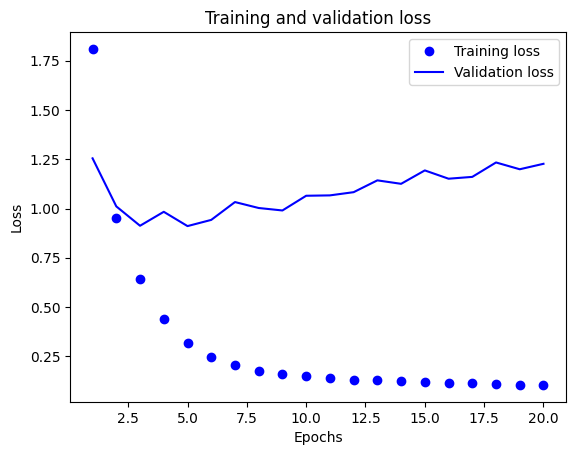

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

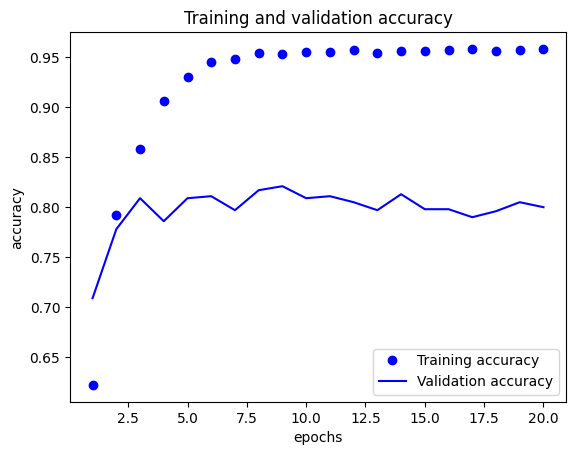

In [20]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, "bo", label='Training accuracy')
plt.plot(epochs, val_acc, "b", label='Validation accuracy')
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [23]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)


results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 35ms/step - loss: 2.4745 - accuracy: 0.5436
Epoch 2/9
18/18 [==============================] - 1s 40ms/step - loss: 1.3141 - accuracy: 0.7293
Epoch 3/9
18/18 [==============================] - 1s 40ms/step - loss: 0.9662 - accuracy: 0.7989
Epoch 4/9
18/18 [==============================] - 1s 33ms/step - loss: 0.7529 - accuracy: 0.8426
Epoch 5/9
18/18 [==============================] - 1s 28ms/step - loss: 0.5943 - accuracy: 0.8784
Epoch 6/9
18/18 [==============================] - 1s 35ms/step - loss: 0.4755 - accuracy: 0.9001
Epoch 7/9
18/18 [==============================] - 1s 31ms/step - loss: 0.3838 - accuracy: 0.9185
Epoch 8/9
18/18 [==============================] - 1s 32ms/step - loss: 0.3151 - accuracy: 0.9311
Epoch 9/9
71/71 [==============================] - 1s 4ms/step - loss: 0.9753 - accuracy: 0.7863


In [24]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 24ms/step - loss: 3.2837 - accuracy: 0.2815 - val_loss: 2.8470 - val_accuracy: 0.5050
Epoch 2/20
63/63 [==============================] - 1s 21ms/step - loss: 2.4579 - accuracy: 0.5571 - val_loss: 2.3272 - val_accuracy: 0.5650
Epoch 3/20
63/63 [==============================] - 1s 21ms/step - loss: 2.1054 - accuracy: 0.5735 - val_loss: 2.1803 - val_accuracy: 0.5590
Epoch 4/20
63/63 [==============================] - 1s 19ms/step - loss: 1.9264 - accuracy: 0.5749 - val_loss: 2.0850 - val_accuracy: 0.5390
Epoch 5/20
63/63 [==============================] - 1s 19ms/step - loss: 1.7706 - accuracy: 0.5489 - val_loss: 1.9903 - val_accuracy: 0.5060
Epoch 6/20
63/63 [==============================] - 1s 19ms/step - loss: 1.5769 - accuracy: 0.5492 - val_loss: 1.7641 - val_accuracy: 0.5140
Epoch 7/20
63/63 [==============================] - 1s 17ms/step - loss: 1.2565 - accuracy: 0.6721 - val_loss: 1.5569 - val_accuracy: 0.6530
Epoch 8/20
63